<a href="https://colab.research.google.com/github/Ayakhaled200/Yolo/blob/main/Yolo8_Try_On_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


image 1/1 /content/image_1.jpg: 256x640 3 cars, 97.1ms
Speed: 2.0ms preprocess, 97.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)


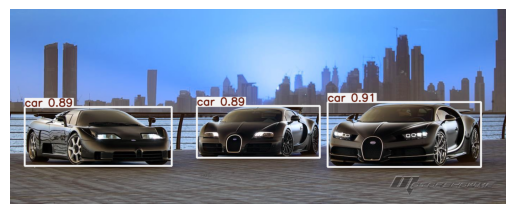


image 1/1 /content/image_0.jpg: 640x640 4 persons, 343.8ms
Speed: 4.8ms preprocess, 343.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


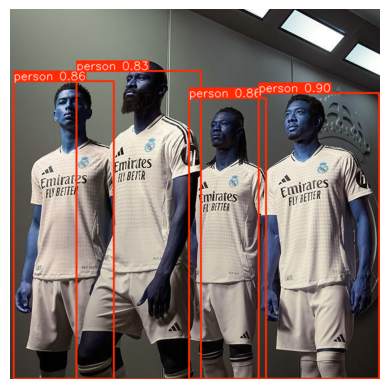

In [ ]:
# !pip install ultralytics
# !pip install requests


import requests
from PIL import Image
from io import BytesIO
import glob
from ultralytics import YOLO
import matplotlib.pyplot as plt

# List of image URLs
image_urls = [
    'https://us.shop.realmadrid.com/_next/image?url=https%3A%2F%2Fimages.ctfassets.net%2F7nqb12anqb19%2F6XGrIIWUz04U0LjVkaXO03%2Fb1b9e77d88a5db3db5fdc9ce22e1418f%2Fallkits-mobile-hp_adidas.jpg&w=1920&q=75',
    'https://www.motorshow.me/uploadImages/DocumentImages/Doc-P-114032-2637213430434285407.jpg',
    # Add more URLs here
]

# Download and save images
for i, url in enumerate(image_urls):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.save(f'image_{i}.jpg')

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# List of downloaded image paths
image_paths = glob.glob('image_*.jpg')

# Process each image
for image_path in image_paths:
    # Perform detection
    results = model(image_path)

    # results is a list, so we iterate through each result
    for result in results:
        # Convert to PIL Image
        result_image = Image.fromarray(result.plot())

        # Show the result
        plt.imshow(result_image)
        plt.axis('off')
        plt.show()
